Importing all data

In [1]:
# importing all the required modules
import pyodbc
import pandas as pds
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sea
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing financial_data table

# Defining the connection to the SQL Server
conn_str = (
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=DESKTOP-0FIICAT\SQLEXPRESS01;'
    r'DATABASE=capstone;'  
    r'Trusted_Connection=yes;'
)

# Making connection to the SQL Server
conn = pyodbc.connect(conn_str)

# Query for importing the financial_data
query1 = "SELECT * FROM financial_data"

# Reading the query result into a Pandas DataFrame
financial_df = pds.read_sql(query1, conn)

# Print the first few rows of the DataFrame to confirm
print(financial_df.head())

# Close the connection
conn.close()

   transaction_id  customer_id  merchant_id       amount transaction_time  \
0               1         1082         2027  5758.589844       2023-01-01   
1               2         1015         2053  1901.560059       2023-01-01   
2               3         1004         2035  1248.859985       2023-01-01   
3               4         1095         2037  7619.049805       2023-01-01   
4               5         1036         2083  1890.099976       2023-01-01   

   is_fraudulent card_ID    transaction_description          CLV location_ID  
0          False   5000A  Purchase at Merchant-2027  2789.186279     City-30  
1           True   5000B  Purchase at Merchant-2053  3604.427979     City-47  
2           True   5000A  Purchase at Merchant-2035  3053.540527      City-6  
3           True   5000C  Purchase at Merchant-2037  2769.927490      City-6  
4           True   5000A  Purchase at Merchant-2083  2175.908447     City-34  


In [3]:
# Establish a connection to the SQL Server
conn = pyodbc.connect(conn_str)

# Query to import Customer_Details
query2 = "SELECT * FROM Customer_Details"

# Read the query result into a Pandas DataFrame
Customer_df = pds.read_sql(query2, conn)

# Print the first few rows of the DataFrame to confirm
print(Customer_df.head())

# Close the connection
conn.close()

   customer_id  Customer_Age  Account_Tenure_Years  Transaction_Frequency
0         1001            66                     7                    103
1         1002            62                    20                    176
2         1003            68                    15                    364
3         1004            57                    11                    218
4         1005            41                     8                    479


In [4]:
# Establish a connection to the SQL Server
conn = pyodbc.connect(conn_str)

# Query to import merchant_details
query3 = "SELECT * FROM Merchant_Details"

# Read the query result into a Pandas DataFrame
merchant_df = pds.read_sql(query3, conn)

# Print the first few rows of the DataFrame to confirm
print(merchant_df.head())

# Close the connection
conn.close()

   merchant_id purchase_category
0         2001            Retail
1         2002         Groceries
2         2003   Online Shopping
3         2004            Retail
4         2005         Groceries


In [5]:
# Establish a connection to the SQL Server
conn = pyodbc.connect(conn_str)

# Query to import another table
query4 = "SELECT * FROM location_details"

# Read the query result into a Pandas DataFrame
location_df = pds.read_sql(query4, conn)

# Print the first few rows of the DataFrame to confirm
print(location_df.head())

# Close the connection
conn.close()

  location_ID       City       Country
0      City-1     Berlin       Germany
1     City-10  Amsterdam   Netherlands
2     City-11     Riyadh  Saudi Arabia
3     City-12    Seville         Spain
4     City-13     Moscow        Russia


In [6]:
# Establish a connection to the SQL Server
conn = pyodbc.connect(conn_str)

# Query to import another table
query4 = "SELECT * FROM Card_Details"

# Read the query result into a Pandas DataFrame
Card_df = pds.read_sql(query4, conn)

# Print the first few rows of the DataFrame to confirm
print(Card_df.head())

# Close the connection
conn.close()

  card_ID         card_type
0   5000A        MasterCard
1   5000B              Visa
2   5000C          Discover
3   5000D  American Express


Showing all data

In [7]:
# Removing the unnecessary columns
fin_df = financial_df.drop(columns=['transaction_time', 'transaction_description'])

fin_df.head(10)

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,card_ID,CLV,location_ID
0,1,1082,2027,5758.589844,False,5000A,2789.186279,City-30
1,2,1015,2053,1901.560059,True,5000B,3604.427979,City-47
2,3,1004,2035,1248.859985,True,5000A,3053.540527,City-6
3,4,1095,2037,7619.049805,True,5000C,2769.927490,City-6
4,5,1036,2083,1890.099976,True,5000A,2175.908447,City-34
5,6,1032,2021,8487.679688,True,5000D,3264.881104,City-1
6,7,1029,2033,7565.299805,True,5000B,2244.177246,City-7
7,8,1018,2088,2284.879883,False,5000D,4469.687500,City-46
8,9,1095,2077,3952.729980,False,5000D,4821.947754,City-45
9,10,1014,2031,8362.040039,False,5000B,1978.863403,City-25


In [8]:
merchant_df.head(10)

,merchant_id,purchase_category
0,2001,Retail
1,2002,Groceries
2,2003,Online Shopping
3,2004,Retail
4,2005,Groceries
5,2006,Restaurant
6,2007,Online Shopping
7,2008,Online Shopping
8,2009,Restaurant
9,2010,Groceries


In [9]:
#showing top 5 rows of the data
Customer_df.head()

,customer_id,Customer_Age,Account_Tenure_Years,Transaction_Frequency
0,1001,66,7,103
1,1002,62,20,176
2,1003,68,15,364
3,1004,57,11,218
4,1005,41,8,479


In [10]:
Card_df.head()

,card_ID,card_type
0,5000A,MasterCard
1,5000B,Visa
2,5000C,Discover
3,5000D,American Express


In [11]:
location_df.head()

,location_ID,City,Country
0,City-1,Berlin,Germany
1,City-10,Amsterdam,Netherlands
2,City-11,Riyadh,Saudi Arabia
3,City-12,Seville,Spain
4,City-13,Moscow,Russia


Null Values Checking

In [12]:
# Checking for the null values
fin_df.isnull().sum()

transaction_id    0
customer_id       0
merchant_id       0
amount            0
is_fraudulent     0
card_ID           0
CLV               0
location_ID       0
dtype: int64

Merging Data

In [13]:
# Merging the Financial Data with the Customer Data
merged_1 = fin_df.merge(Customer_df, on='customer_id', how='left')

In [14]:
merged_1.head()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,card_ID,CLV,location_ID,Customer_Age,Account_Tenure_Years,Transaction_Frequency
0,1,1082,2027,5758.589844,False,5000A,2789.186279,City-30,43,11,460
1,2,1015,2053,1901.560059,True,5000B,3604.427979,City-47,61,6,222
2,3,1004,2035,1248.859985,True,5000A,3053.540527,City-6,57,11,218
3,4,1095,2037,7619.049805,True,5000C,2769.927490,City-6,59,8,164
4,5,1036,2083,1890.099976,True,5000A,2175.908447,City-34,36,14,489


In [15]:
# Merging the above data with Merchant Details data
merged_2 = merged_1.merge(merchant_df, on='merchant_id', how='left')

In [16]:
merged_2.head()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,card_ID,CLV,location_ID,Customer_Age,Account_Tenure_Years,Transaction_Frequency,purchase_category
0,1,1082,2027,5758.589844,False,5000A,2789.186279,City-30,43,11,460,Gas Station
1,2,1015,2053,1901.560059,True,5000B,3604.427979,City-47,61,6,222,Online Shopping
2,3,1004,2035,1248.859985,True,5000A,3053.540527,City-6,57,11,218,Gas Station
3,4,1095,2037,7619.049805,True,5000C,2769.927490,City-6,59,8,164,Travel
4,5,1036,2083,1890.099976,True,5000A,2175.908447,City-34,36,14,489,Retail


In [17]:
# Merging the above data with Merchant Details data
merged_3 = merged_2.merge(location_df, on='location_ID', how='left')

In [18]:
merged_3.head()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,card_ID,CLV,location_ID,Customer_Age,Account_Tenure_Years,Transaction_Frequency,purchase_category,City,Country
0,1,1082,2027,5758.589844,False,5000A,2789.186279,City-30,43,11,460,Gas Station,New York,USA
1,2,1015,2053,1901.560059,True,5000B,3604.427979,City-47,61,6,222,Online Shopping,London,UK
2,3,1004,2035,1248.859985,True,5000A,3053.540527,City-6,57,11,218,Gas Station,Paris,France
3,4,1095,2037,7619.049805,True,5000C,2769.927490,City-6,59,8,164,Travel,Paris,France
4,5,1036,2083,1890.099976,True,5000A,2175.908447,City-34,36,14,489,Retail,Tokyo,Japan


In [19]:
# Merging previous merged data with the Card Details data
final_data = merged_3.merge(Card_df, on='card_ID', how='left')

In [20]:
final_data.head()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,card_ID,CLV,location_ID,Customer_Age,Account_Tenure_Years,Transaction_Frequency,purchase_category,City,Country,card_type
0,1,1082,2027,5758.589844,False,5000A,2789.186279,City-30,43,11,460,Gas Station,New York,USA,MasterCard
1,2,1015,2053,1901.560059,True,5000B,3604.427979,City-47,61,6,222,Online Shopping,London,UK,Visa
2,3,1004,2035,1248.859985,True,5000A,3053.540527,City-6,57,11,218,Gas Station,Paris,France,MasterCard
3,4,1095,2037,7619.049805,True,5000C,2769.927490,City-6,59,8,164,Travel,Paris,France,Discover
4,5,1036,2083,1890.099976,True,5000A,2175.908447,City-34,36,14,489,Retail,Tokyo,Japan,MasterCard


In [21]:
# description of the data
final_data.describe()

,transaction_id,customer_id,merchant_id,amount,CLV,Customer_Age,Account_Tenure_Years,Transaction_Frequency
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1051.272300,2050.486600,4958.381619,2532.648570,43.763400,9.948900,247.692000
std,2886.89568,28.864062,28.877801,2899.699677,1419.067363,14.664519,5.526513,136.399665
min,1.00000,1001.000000,2001.000000,10.610000,100.355003,18.000000,1.000000,9.000000
25%,2500.75000,1026.000000,2025.000000,2438.175049,1302.019226,34.000000,5.000000,138.000000
50%,5000.50000,1052.000000,2050.000000,4943.945068,2518.155029,43.000000,9.000000,235.000000
75%,7500.25000,1076.000000,2076.000000,7499.312622,3766.635071,56.000000,15.000000,363.000000
max,10000.00000,1100.000000,2100.000000,9999.750000,4999.892090,70.000000,20.000000,489.000000


In [22]:
# checking duplicate rows
final_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [23]:
# information of the dataset
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         10000 non-null  int64  
 1   customer_id            10000 non-null  int64  
 2   merchant_id            10000 non-null  int64  
 3   amount                 10000 non-null  float64
 4   is_fraudulent          10000 non-null  bool   
 5   card_ID                10000 non-null  object 
 6   CLV                    10000 non-null  float64
 7   location_ID            10000 non-null  object 
 8   Customer_Age           10000 non-null  int64  
 9   Account_Tenure_Years   10000 non-null  int64  
 10  Transaction_Frequency  10000 non-null  int64  
 11  purchase_category      10000 non-null  object 
 12  City                   10000 non-null  object 
 13  Country                10000 non-null  object 
 14  card_type              10000 non-null  object 
dtypes: 

# Exploratory Data Analysis (EDA)

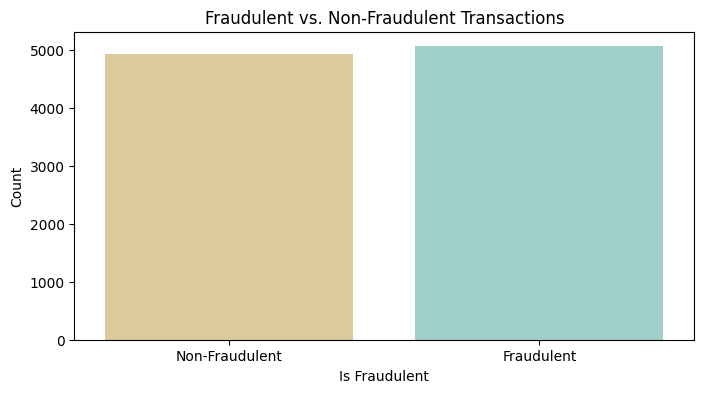

In [24]:
# Visualizing the counts of different types transactions
plt.figure(figsize=(8,4))
sea.countplot(x='is_fraudulent', data=final_data, palette='BrBG')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.xticks([0,1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

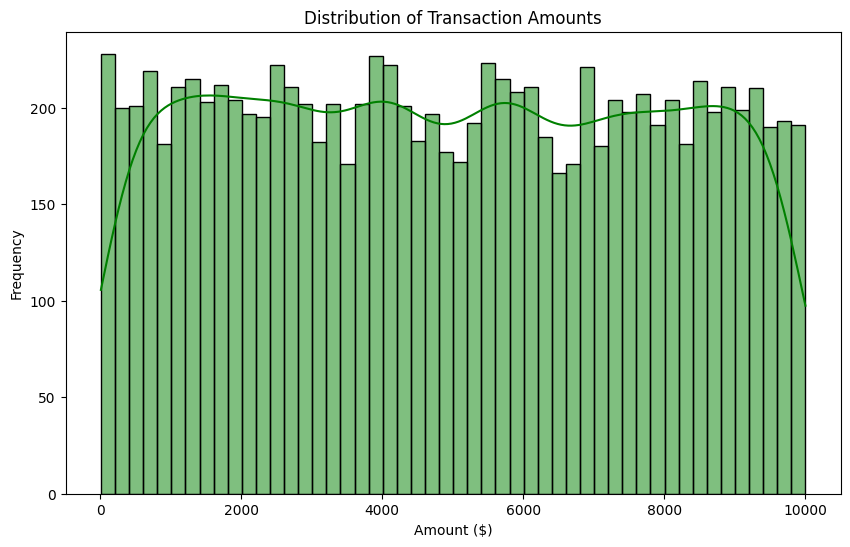

In [25]:
# Showing the distribution of the transactions
plt.figure(figsize=(10,6))
sea.histplot(final_data['amount'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()

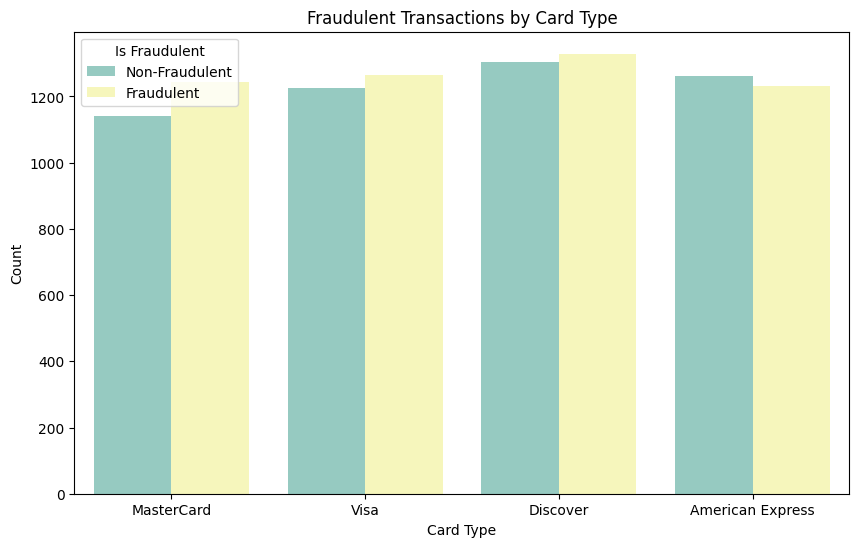

In [26]:
# Showing transactions by card type
plt.figure(figsize=(10,6))
sea.countplot(x='card_type', hue='is_fraudulent', data=final_data, palette='Set3')
plt.title('Fraudulent Transactions by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Is Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

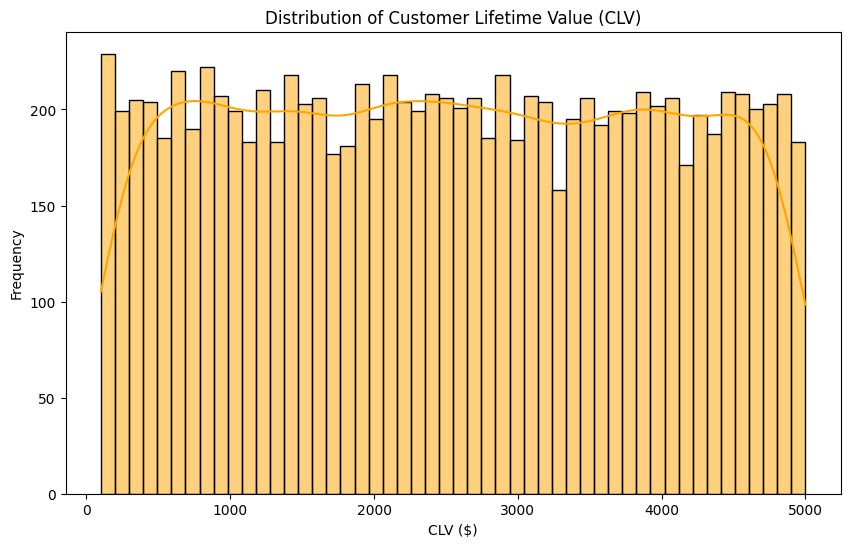

In [27]:
# distribution of CLV
plt.figure(figsize=(10,6))
sea.histplot(final_data['CLV'], bins=50, kde=True, color='orange')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV ($)')
plt.ylabel('Frequency')
plt.show()

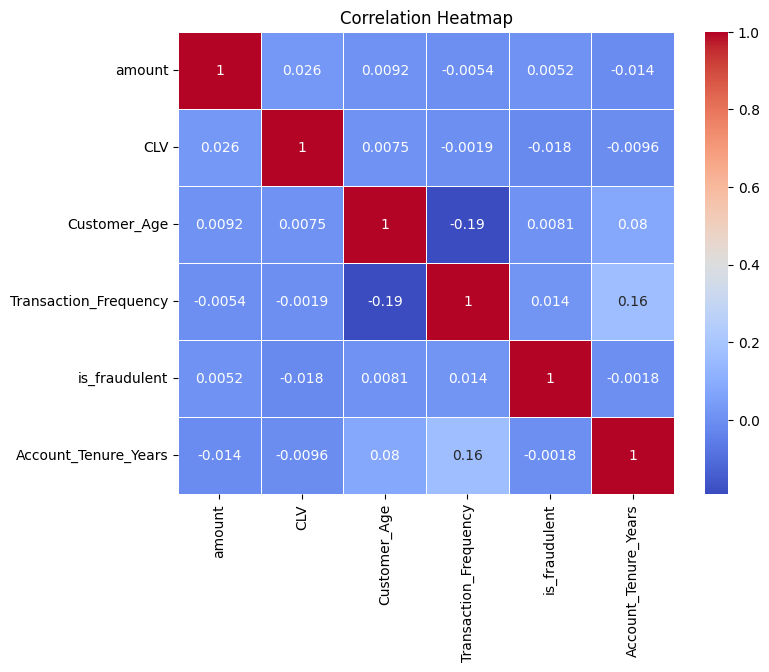

In [28]:
# Evaluating the correlation matrix
corr_matrix = final_data[['amount', 'CLV', 'Customer_Age','Transaction_Frequency', 'is_fraudulent', 'Account_Tenure_Years']].corr()
# Plotting the heatmap
plt.figure(figsize=(8,6))
sea.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

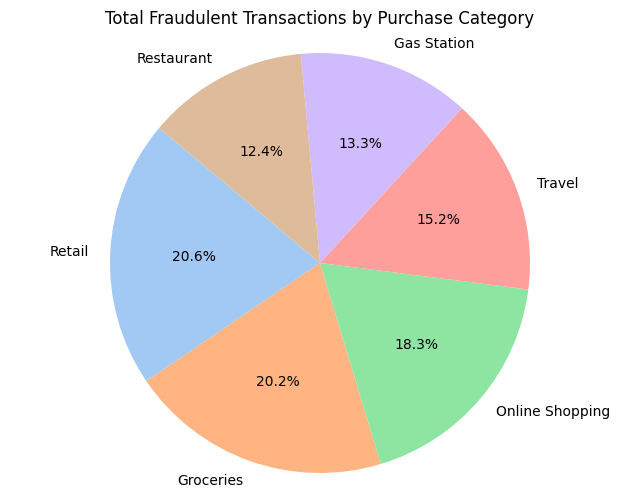

In [29]:
# Filtering the fraudulent transactions
fraudulent_data = final_data[final_data['is_fraudulent'] == 1]
# Counting overall fraudulent transactions by the purchase category
fraud_counts = fraudulent_data['purchase_category'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=sea.color_palette('pastel'))
plt.title('Total Fraudulent Transactions by Purchase Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

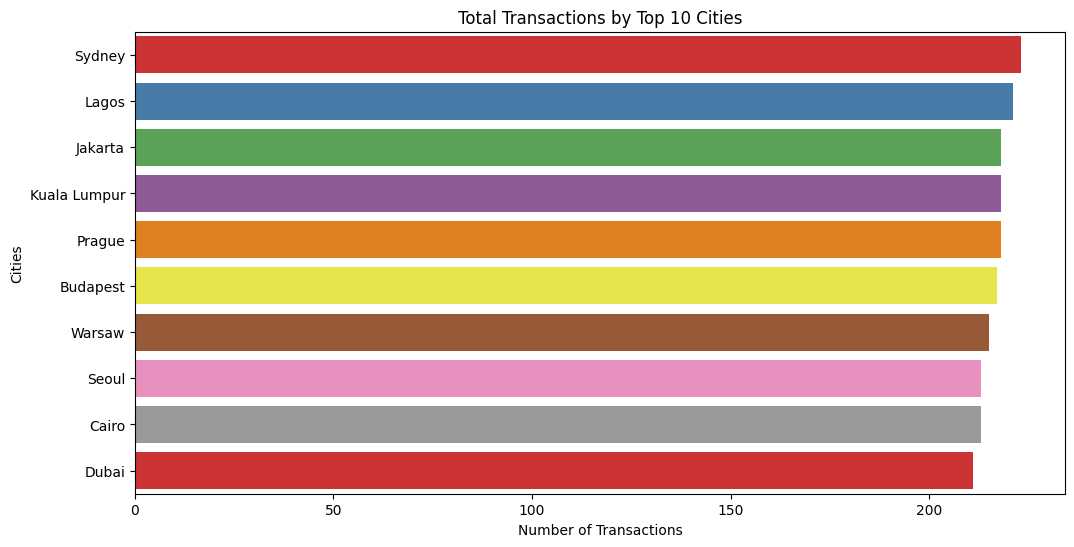

In [30]:
# Recognizing transactions by top 10 cities
top_cities = final_data['City'].value_counts().nlargest(10)
# Developing the horizontal bar chart
plt.figure(figsize=(12,6))
sea.barplot(y=top_cities.index, x=top_cities.values, palette='Set1')
# Adding titles and labels
plt.title('Total Transactions by Top 10 Cities')
plt.xlabel('Number of Transactions')
plt.ylabel('Cities')
# Showing the plot
plt.show()

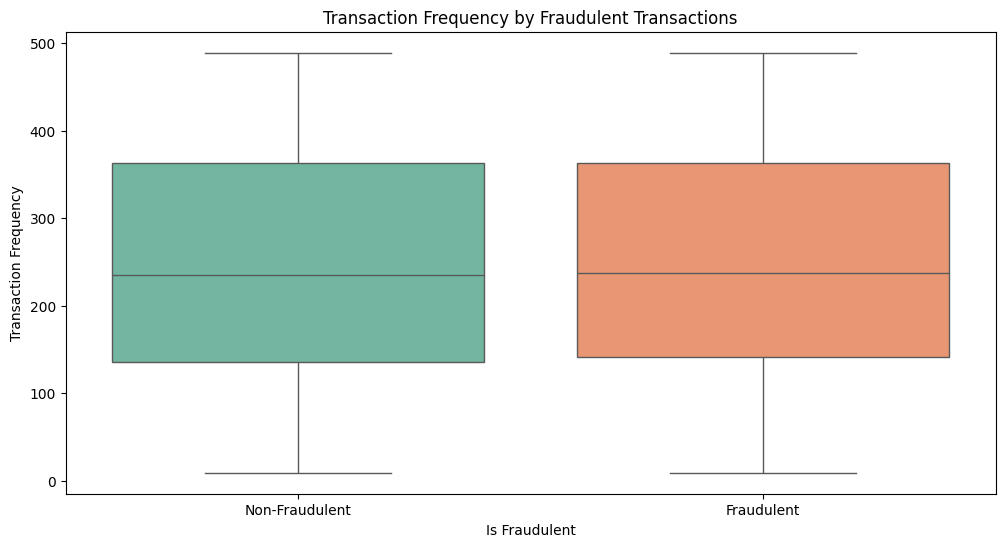

In [31]:
# Generating a boxplot for Transaction_Frequency
plt.figure(figsize=(12, 6))
sea.boxplot(x='is_fraudulent', y='Transaction_Frequency', data=final_data, palette='Set2')
plt.title('Transaction Frequency by Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Transaction Frequency')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()